## Implementating Linear regression by sklearn

Data set - Boston housing dataset


Importing all the library required to perform the experiment

In [1]:
import numpy as np 
import math
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model, metrics 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### mean absolute error and mean square error for different number of iterations

Loading the dataset and splitting into train and test dataset

In [3]:
#loading the dataset
X, y = datasets.load_boston(return_X_y=True) 
#Spltting dataset into test and train dataset
X_train=X[0:400,:] 
y_train=y[0:400] 
X_test=X[400:506,:] 
y_test=y[400:506] 

Doing scailing of the dataset

In [4]:
#Creating the instance of standardScalar
scaler=StandardScaler() 
#Do scailing of the object
scaler.fit(X_train[:,1:]) 
X_train[:,1:]=scaler.transform(X_train[:,1:])
X_test[:,1:]=scaler.transform(X_test[:,1:])

Creating linear regression object for different number of iterations

In [5]:
mean_absolute_errors = []
mean_squared_errors = []
iterations = [i for i in range(10,1000)]
for iteration in iterations:
  # Create linear regression object
  regr = linear_model.SGDRegressor(max_iter=iteration,alpha=0.01,eta0=0.002) 
  # Train the model using the training sets 
  regr.fit(X_train, y_train)
  predictions=regr.predict(X_test) 
  mean_absolute_errors.append(metrics.mean_absolute_error(y_test,predictions))
  mean_squared_errors.append(metrics.mean_squared_error(y_test,predictions))

### plot the graph of MSE vs number of iterations, MAE vs number of iterations

Plot 1- Mean square error vs number of iterations

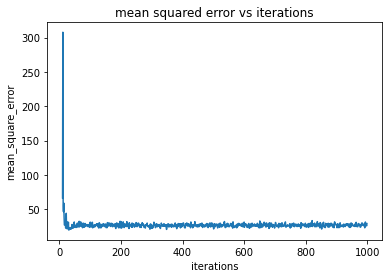

In [23]:
plt.plot(iterations,mean_squared_errors)
plt.xlabel("iterations")
plt.ylabel("mean_square_error")
plt.title("mean squared error vs iterations")
plt.show()

Plot 2- Mean absolute error vs number of iterations

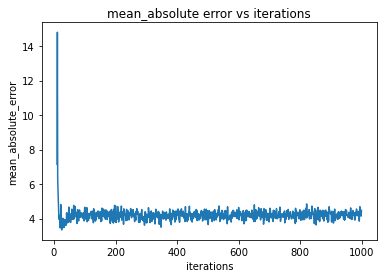

In [24]:
plt.plot(iterations,mean_absolute_errors)
plt.xlabel("iterations")
plt.ylabel("mean_absolute_error")
plt.title("mean_absolute error vs iterations")
plt.show()

Plot 3- MAE and MSE vs number of iterations

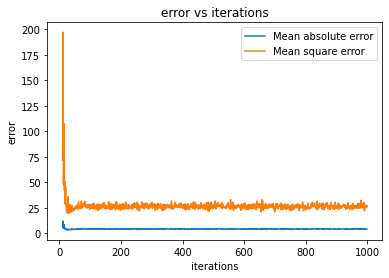

In [39]:
plt.plot(iterations,mean_absolute_errors,label="Mean absolute error")
plt.plot(iterations,mean_squared_errors,label="Mean square error")
plt.xlabel("iterations")
plt.ylabel("error")
plt.title("error vs iterations")
plt.legend()
plt.show()

In plot 3, as MAE and MSE are different scale , we donot get suitable graph comparsion

# Observation:-
1. After a certain number of iterations , MSE and MAE become constant satisfying the elbow method theory
2. Hence we can say that high number of iterations doesnot reduces error 